In [1]:
from cosmoslik import *

In [2]:
chain=load_chain("LBAOSNnonpar.chain")

In [3]:
print(chain)

     # of chains:  2
      # of steps:  76500
    total weight:  298654.00
      acceptance:  0.256
              H0:       73.66 ± 1.613
             Hz1:       80.43 ± 2.075
             Hz2:       100.8 ± 2.788
             Hz3:       116.5 ± 5.886
             Hz4:       190.5 ± 45.58
        alphaBAO:      0.2953 ± 0.003977
         alphaSN:      0.3627 ± 0.003175


/nfs/home/mjoy/myVE/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


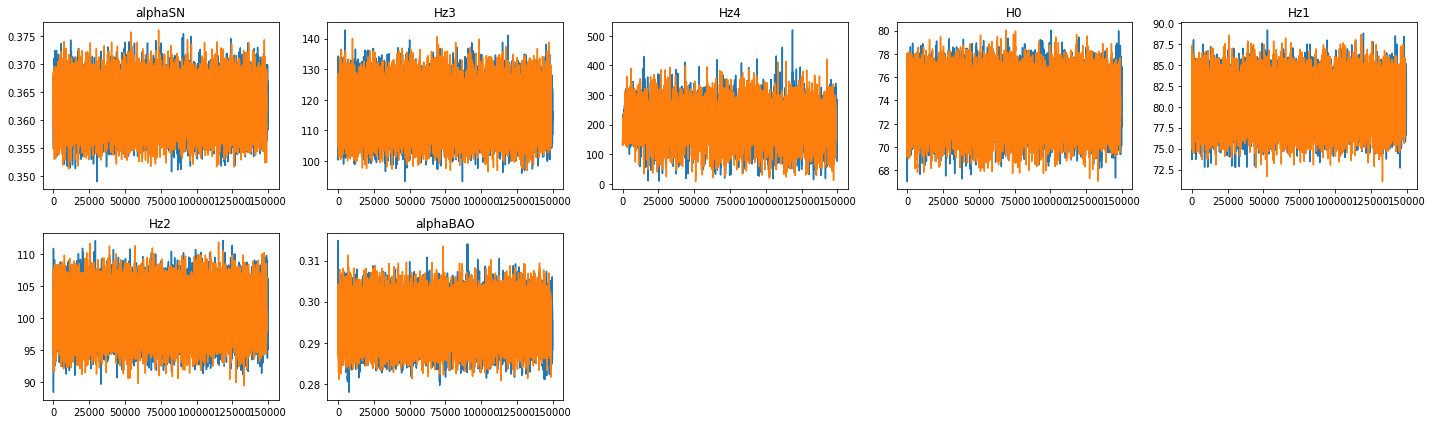

In [5]:
chain.plot()

In [5]:
chain=chain.burnin(25000).join()
length=chain.length()
print(length)
print(length/2)

63105
31552.5


In [6]:
chain['rs']=2.998e05/(chain['H0']*chain['alphaBAO']*100)
print(chain)

      # of steps:  63105
    total weight:  248658.00
      acceptance:  0.254
              H0:       73.65 ± 1.61
             Hz1:       80.43 ± 2.07
             Hz2:       100.8 ± 2.778
             Hz3:       116.6 ± 5.864
             Hz4:       190.1 ± 46.13
        alphaBAO:      0.2953 ± 0.003967
         alphaSN:      0.3627 ± 0.003164
              rs:       137.9 ± 3.536


In [8]:
chain.sample(slice(0,31552))

      # of steps:  31552
    total weight:  123786.00
      acceptance:  0.255
              H0:       73.68 ± 1.603
             Hz1:       80.46 ± 2.05
             Hz2:       100.8 ± 2.752
             Hz3:       116.5 ± 5.803
             Hz4:         191 ± 45.23
        alphaBAO:      0.2953 ± 0.003975
         alphaSN:      0.3626 ± 0.003136
              rs:       137.9 ± 3.497

In [9]:
chain.sample(slice(31553,63104))

      # of steps:  31551
    total weight:  124869.00
      acceptance:  0.253
              H0:       73.63 ± 1.617
             Hz1:       80.41 ± 2.089
             Hz2:       100.8 ± 2.803
             Hz3:       116.6 ± 5.924
             Hz4:       189.2 ± 47
        alphaBAO:      0.2953 ± 0.00396
         alphaSN:      0.3627 ± 0.003191
              rs:         138 ± 3.574

In [3]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
from scipy.interpolate import *

/nfs/home/mjoy/myVE/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


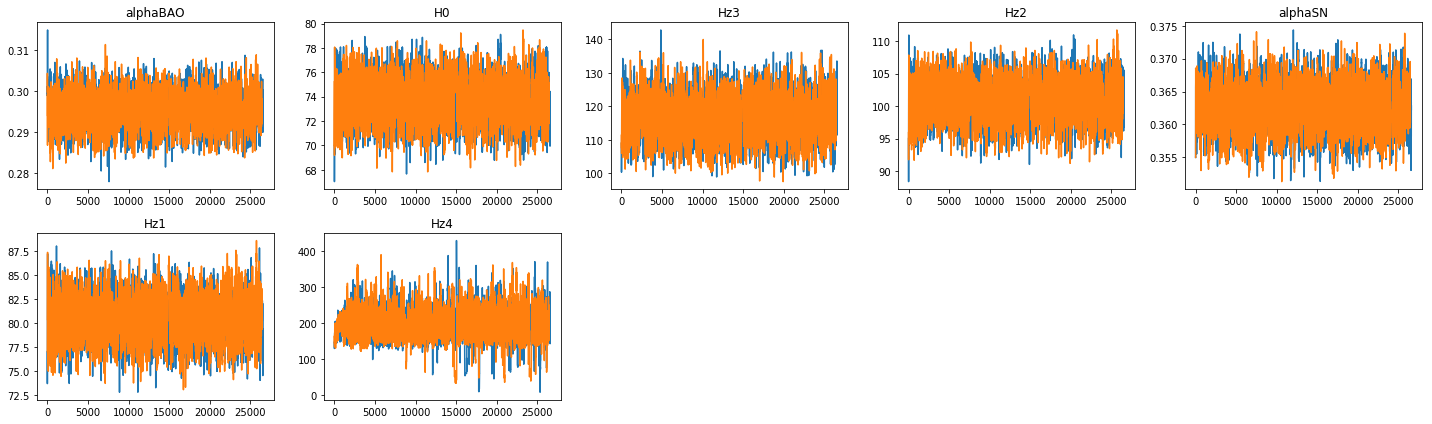

In [5]:
chain.plot()

In [7]:
chain=chain.burnin(15000).join()

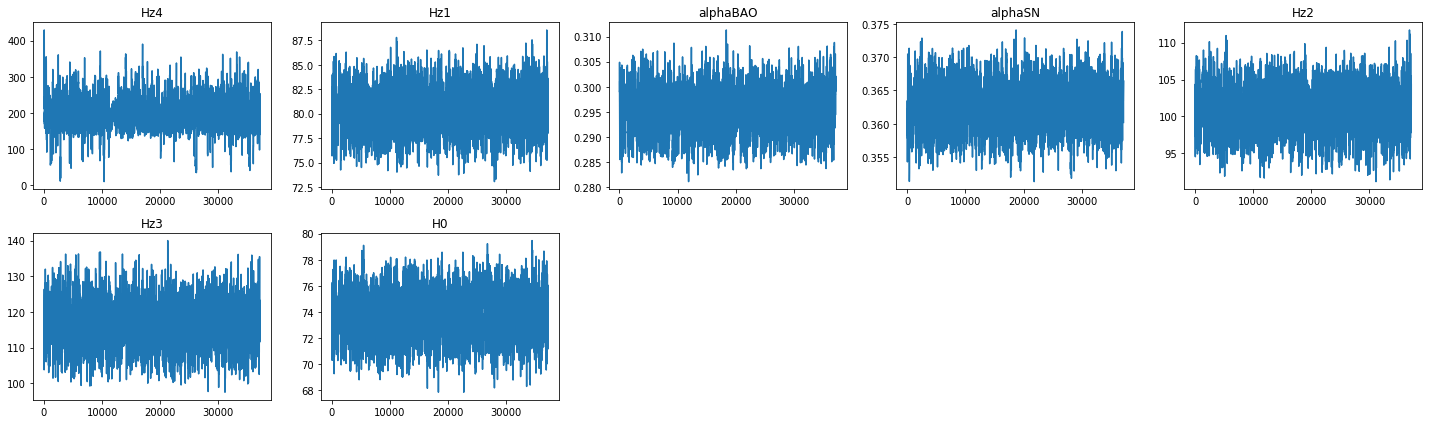

In [8]:
chain.plot()

/nfs/home/mjoy/myVE/lib/python3.4/site-packages/CosmoSlik-1.0.0-py3.4-linux-x86_64.egg/cosmoslik/chains.py:430: MatplotlibDeprecationWarning: The movavg function was deprecated in version 2.2.
  xem, yem = movavg(xe,2), movavg(ye,2)


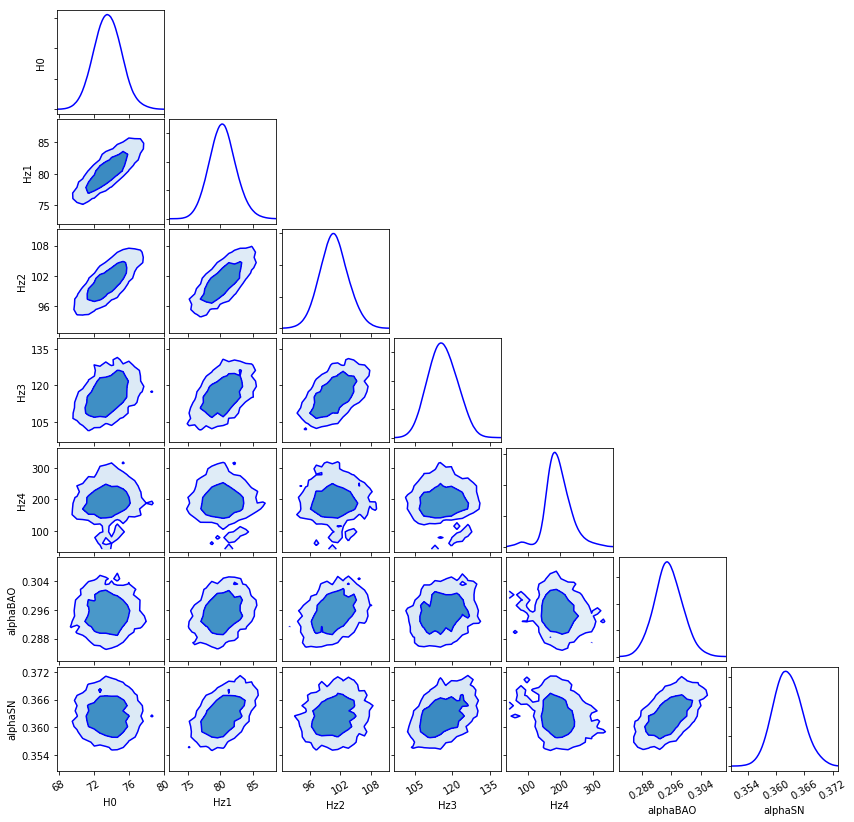

In [6]:
chain.likegrid()

In [8]:
chain.best_fit()

{'H0': 73.52427454613752,
 'Hz1': 79.92931359719891,
 'Hz2': 100.79532187160518,
 'Hz3': 115.13102044936265,
 'Hz4': 177.71389742046352,
 'alphaBAO': 0.29476623274200864,
 'alphaSN': 0.361546946403282,
 'lnl': 20.54033519487718,
 'lsn': 1.1278106271995503,
 'rs': 138.33215717827918,
 'weight': 10.0}

In [8]:
chain.best_fit()

{'H0': 72.69922265048339,
 'Hz1': 79.31914691468643,
 'Hz2': 96.29161710846586,
 'Hz3': 107.50402262601474,
 'Hz4': 45.99813372158267,
 'alphaBAO': 0.2964369844780162,
 'alphaSN': 0.36238175174269754,
 'lnl': 19.557650733941387,
 'weight': 10.0}

In [7]:
#getting the likelihood at above location
zguess=[0,.2,.57,.8,1.3]
c=2.998e8 #speed of light (m/s)
rfid=147.78
H0=73.65341587419009
alphaSN=0.3633591702703294
alphaBAO=0.2955412547857147
Hzguess=[1,80.71503022936942/H0,100.64001747712531/H0,114.17074095691719/H0
         ,175.92317155433608/H0]
Hz_cs=sp.interpolate.CubicSpline(zguess,Hzguess)
zdata=np.loadtxt("z_SN.txt")
zdata=np.array(zdata)
mbdata=np.loadtxt("mb_SN.txt")
dmbdata=np.loadtxt("dmb_SN.txt")
        
Csys=np.loadtxt("SNe_Csys.txt")
Csys=np.array(Csys)
shape=(40,40)
Csys=Csys.reshape(shape)
Cstat=np.zeros((40,40))
k=0
j=0
while k<40 and j<40:
    Cstat[k,j]=(dmbdata[k])**2 #statistical covariance matrix for SN data
    k=k+1
    j=j+1
C_SN=Cstat+Csys
        
z=[0.38,0.51,0.61]
DdHd=np.array([1512.39,81.2087,1975.22,90.9029,2306.68,98.9647])
mbmodel=np.array([])
def integrand(z,Hz_cs):
    return 1/Hz_cs(z)
i=0
while i<40:
    DL=quad(integrand,0,zdata[i],args=(Hz_cs))[0]*alphaSN*10000*(1+zdata[i])
    mb= -19 + 5*np.log10(DL) + 25
    mbmodel=np.append(mbmodel,mb)
    i=i+1
Mbmodel=np.array(mbmodel)
        
be=np.loadtxt("BAO_consensus_covtot_dM_Hz.txt")
C_BAO=np.array(be)
md=np.array([])
n=0
while n<3:
    Dz=quad(integrand,0,z[n],args=(Hz_cs))
    md=np.append(md,Dz[0]*alphaBAO*rfid*100)
    md=np.append(md,Hz_cs(z[n])*(c/1000)*rfid**(-1)*(alphaBAO*100)**(-1))
    n=n+1
Md=np.array(md)
        
LSN=0.5*(np.dot(Mbmodel-mbdata,np.dot(np.linalg.inv(C_SN),(Mbmodel-mbdata))))
LBAO=0.5*np.dot(Md-DdHd,np.dot(np.linalg.inv(C_BAO),(Md-DdHd)))
print(2*LSN)
print(2*LBAO)

38.01192227345695
3.3765966125886897


In [9]:
-2*20.697651

-41.395302

In [7]:
c=2.998e8
chain['lsn']=c/1000/chain['H0']/(chain['alphaSN']*10000)
print(chain)

      # of steps:  63105
    total weight:  248658.00
      acceptance:  0.254
              H0:       73.65 ± 1.61
             Hz1:       80.43 ± 2.07
             Hz2:       100.8 ± 2.778
             Hz3:       116.6 ± 5.864
             Hz4:       190.1 ± 46.13
        alphaBAO:      0.2953 ± 0.003967
         alphaSN:      0.3627 ± 0.003164
             lsn:       1.123 ± 0.02633
              rs:       137.9 ± 3.536


In [9]:
import numpy as np
-5*np.log10(1.1278106271995503)-19

-19.261180912834547

In [6]:
chain['rs']=2.998e05/(chain['H0']*chain['alphaBAO']*100)
print(chain)

      # of steps:  10100
    total weight:  37552.00
      acceptance:  0.269
              H0:       73.66 ± 1.629
             Hz1:        80.4 ± 2.085
             Hz2:       100.9 ± 2.786
             Hz3:       116.3 ± 5.885
             Hz4:       191.5 ± 41.11
        alphaBAO:      0.2954 ± 0.004023
         alphaSN:      0.3625 ± 0.003176
              rs:       137.9 ± 3.514


/nfs/home/mjoy/myVE/lib/python3.4/site-packages/CosmoSlik-1.0.0-py3.4-linux-x86_64.egg/cosmoslik/chains.py:430: MatplotlibDeprecationWarning: The movavg function was deprecated in version 2.2.
  xem, yem = movavg(xe,2), movavg(ye,2)


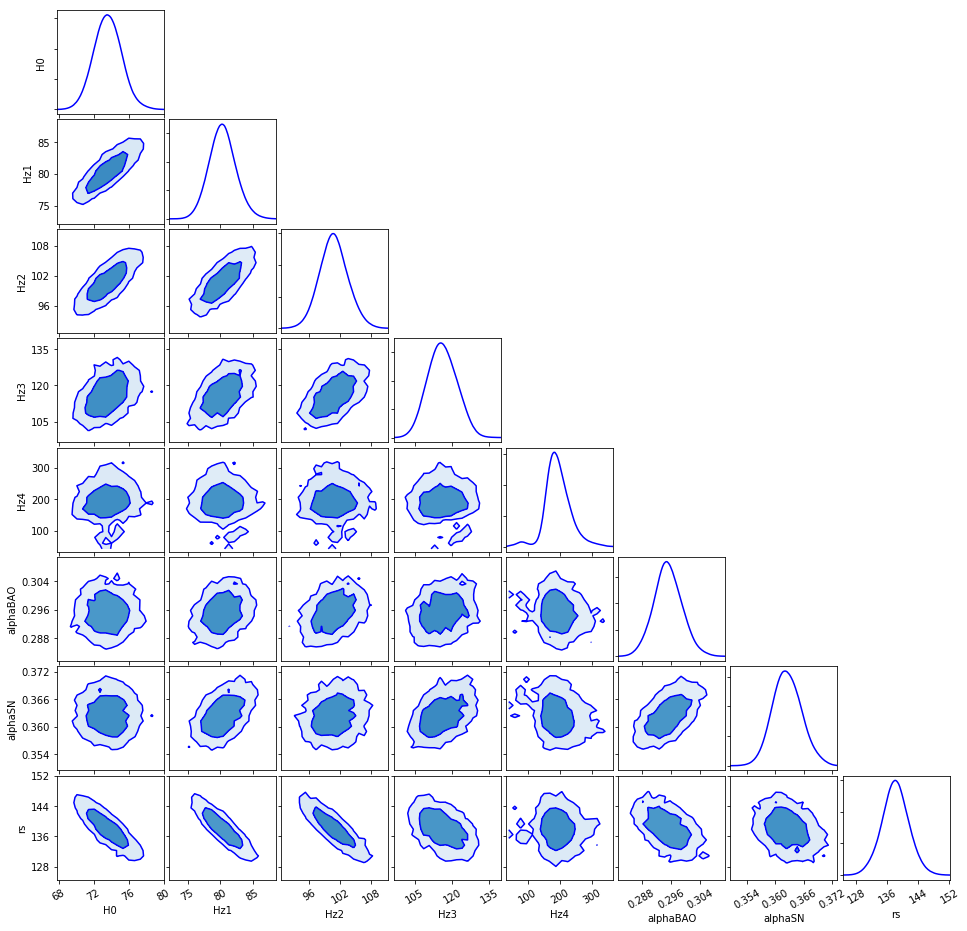

In [8]:
chain.likegrid()

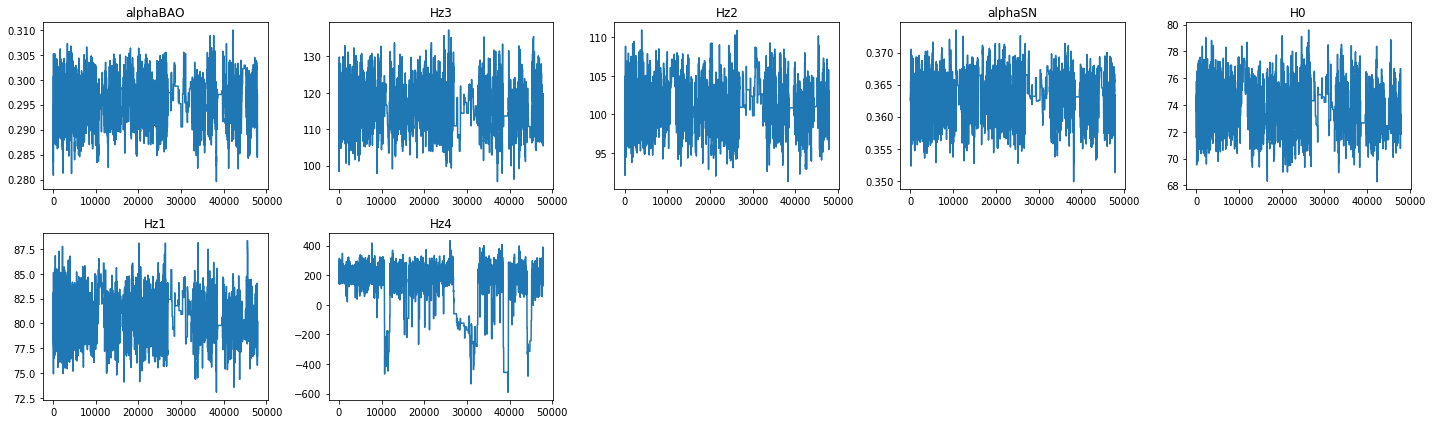

In [7]:
chain.plot()

In [10]:
H=[73.67,80.51,100.9,116.4,191.6]
Herr=[1.669,2.115,2.786,6.608,46.75]
alphaBAOnon=.2955
BAOerrnon=.003937
alphaSNnon=.3628
SNerrnon=.003162
rsnon=137.8
rserrnon=3.575

In [11]:
H0=73.5
H0err=1.645
alphaBAO=.2967
BAOerr=0.003648
alphaSN=.3644
SNerr=0.001677
wm=.2967
wmerr=0.02011

In [ ]:
chain=chain.burnin(3000).join()

In [3]:
import scipy as sp
from scipy.interpolate import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad

In [4]:
zguess=[0,.2,.57,.8,1.3]
Hzguess=[73.66/73.66,80.48/73.66,100.9/73.66,117.4/73.66,181.2/73.66]
Hz_cs=sp.interpolate.CubicSpline(zguess,Hzguess)

In [5]:
be=np.loadtxt("BAO_consensus_covtot_dM_Hz.txt")
co=([be[1,1],be[1,3],be[1,5]],[be[3,1],be[3,3],be[3,5]],[be[5,1],be[5,3],be[5,5]])
errors=np.sqrt(np.diag(co))

No handles with labels found to put in legend.


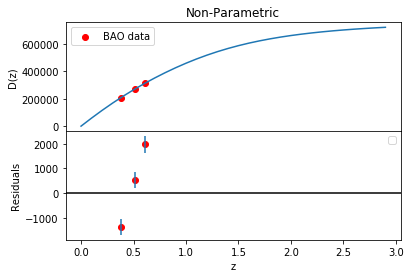

In [20]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
z=np.arange(0,3,.1)
D=np.array([])
rs=137
rfid=147.78
alphaBAO=.2955
def integrand(z,Hz_cs):
    return 1/Hz_cs(z)
def Dz(z):
    return quad(integrand,0,z,args=(Hz_cs))[0]*alphaBAO*100*rs*rfid
for i in range(len(z)):
    D=np.append(D,Dz(z[i]))
ax1.set(title='Non-Parametric')
ax1.plot(z,D)
ax1.set(ylabel='D(z)')
plt.xlabel('z')
zdata=[0.38,0.51,0.61]
Ddata=np.array([1512.39,1975.22,2306.68])*rs
ax1.scatter(zdata,Ddata,label='BAO data',color='r')
ax1.errorbar(zdata,Ddata,yerr=errors*rs,linestyle='None')
plt.legend()
Dguess=np.array([])
for i in range(len(zdata)):
    Dguess=np.append(Dguess,Dz(zdata[i]))
residuals=Ddata-Dguess
ax2.scatter(zdata,residuals,color='r')
ax2.errorbar(zdata,residuals,yerr=errors*rs,linestyle='None')
ax2.axhline(y=0,color='k')
ax2.set(ylabel='Residuals')
fig.subplots_adjust(hspace=0)
ax1.legend()

In [ ]:
chain.savecov("cov_LBAOSN_nonpar.txt")